# Linear Classifier (선형분류)

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기


경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


#### LinearClassifier 실습 01

붓꽃 데이터 셋에 선형분류 적용

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris)) 
iris.keys()
iris.feature_names, iris.target_names

<class 'sklearn.utils.Bunch'>


(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [2]:
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [3]:
X2 = X[:, :2] # 꽂받침의 길이, 넓이
X2[:5, :]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

Text(0, 0.5, 'Sepal width')

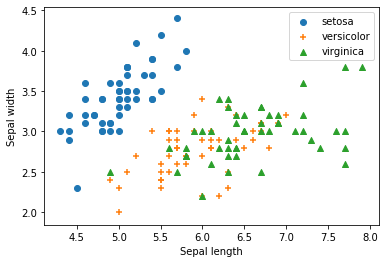

In [4]:
import matplotlib.pyplot as plt

plt.scatter( X2[:, 0][y==0], X2[:, 1][y==0], marker='o')
plt.scatter( X2[:, 0][y==1], X2[:, 1][y==1], marker='+')
plt.scatter( X2[:, 0][y==2], X2[:, 1][y==2], marker='^')
plt.legend( iris.target_names )

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [5]:
y2 = y.copy()
y2[ y2 == 2 ] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split

# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=3)
X_train.shape

(75, 2)

Text(0, 0.5, 'Sepal width')

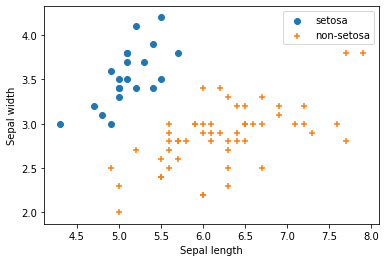

In [7]:
plt.scatter( X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], marker='o')
plt.scatter( X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], marker='+')

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [8]:
# 모델학습
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=10000)
model.fit(X_train, y_train)

model.coef_, model.intercept_

(array([[ 58.39895013, -91.20734908]]), array([-19.10102621]))

Text(0, 0.5, 'Sepal width')

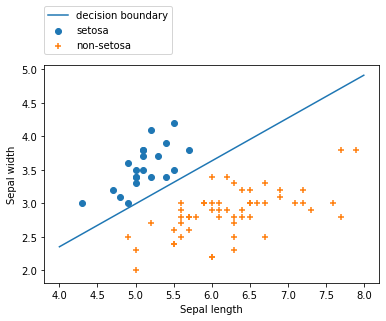

In [22]:
# 결정 경계선
import numpy as np

a = model.coef_[0,0]
b = model.coef_[0,1]
c = model.intercept_

xx = np.linspace(4, 8, 100)
yy = (-a/b) * xx - (c/b)
plt.plot(xx, yy)

plt.scatter( X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], marker='o')
plt.scatter( X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], marker='+')

binary_names = ['decision boundary', 'setosa', 'non-setosa']
plt.legend(binary_names, loc=(0, 1.05))
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [10]:
# 예측
model.predict( [[4.5, 3.5]] )

array([0])

In [11]:
# 스코어 비교
model.score(X2, y2), model.score(X_train, y_train), model.score(X_test, y_test)

(0.9933333333333333, 1.0, 0.9866666666666667)